# <u> Introduction and Problem Statement </u>

* **The term cardiovascular disease (CVD) serves to describe a collection of disorders that impact the heart and blood vessels. Approximately 32% of all casualties globally and around 17.9 million deaths annually are attributable to CVD.**


* **Current CVD diagnostic tools are hampered by several limitations, including invasiveness, interpretability and accessibility, this necessitates the requirement for alternative approaches.**


* **Machine learning (ML) has emerged as an alternative tool for screening CVD, by analysing patterns in existing medical data, ML algorithms can predict disease outcomes with high accuracy, offering a quicker, more accessible and non-invasive approach for detecting CVD.**


* **Numerous studies have shown that ML algorithms are more than capable of accurately predicting patients with CVD, However, many of these studies have neglected fundamental techniques such as feature selection and hyperparameter optimization.**


* **This project aims to investigate the use of supervised classification ML algorithms in predicting patients with CVD, while also incorporating feature selection and hyperparameter optimisation in a bid to enhance performance.**

In [38]:
# Import basic librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings("ignore")

# Reading in dataset

The dataset, known as the Cleveland heart disease dataset, was obtained from the UCI ML
Repository. This dataset was compiled by Dr Robert Detrano and was originally released in 1988 for
the Cleveland Clinic Foundation. The Cleveland heart disease dataset is one of the most frequently
used data sources in the field of CVD research and has been utilised in numerous studies to train and
test ML models for CVD prediction. This data source is extensively used since it encompasses a
diverse set of patient characteristics and is representative of the general population.

In [22]:
# reading in raw data directly from UCI ML repository 
df = pd.read_csv('processed.cleveland.data',sep = ',',header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Formatting columns

In [23]:
# adding in columns names
df.columns =['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Cleaning data

In [24]:
# looking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
# finding rows with ? 
(df == '?').sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [26]:
# dropping rows with ? 
df = df[df.ca != '?']
df = df[df.thal != '?']

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


# Converting columns to appropriate data types

In [28]:
# viewing original datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [29]:
# converting fields ca and thal from objects to floats 
df['thal'] = pd.to_numeric(df['thal'])
df['ca'] = pd.to_numeric(df['ca'])

In [30]:
# changing all columns except oldpeak to int data type 
cols=[i for i in df.columns if i not in ["oldpeak","target"]]
for col in cols:
    df[col]=df[col].astype(np.int64)

In [31]:
# Viewing new datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


# Converting target variable to binary 

The final step of data cleaning was transforming the target attribute into a binary format, this
transformation was carried out because the goal of this project was to develop ML models that
would be able to accurately predict whether patients have CVD or not. This conversion would allow
the data to be used for binary classification.


Initially, the target variable contained 5 classes with labels ranging from 0 to 4, however, through
information relayed on the UCI ML repository I discovered that a label of 0 represented the absence
of CVD and labels 1-4 indicated various types of CVD. To facilitate the data to be used for binary
classification, records with a class label other than 0 were promptly converted to 1.

In [32]:
# label 0 = no CVD, labels 1-4 = CVD 

# printing count of class labels 
print(df.target.value_counts())

0    160
1     54
2     35
3     35
4     13
Name: target, dtype: int64


In [33]:
# changing rows in target field with number other than 0 to 1
df.loc[df['target'] != 0, 'target'] = 1

In [34]:
# print count of new class labels 
print(df.target.value_counts())

0    160
1    137
Name: target, dtype: int64


In [35]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


# Formatting catagorical variables labels to start with 0 

In [36]:
#  Formatting catagorical variables labels to start with 0

df.loc[df['cp'] == 1, 'cp'] = 0
df.loc[df['cp'] == 2, 'cp'] = 1
df.loc[df['cp'] == 3, 'cp'] = 2
df.loc[df['cp'] == 4, 'cp'] = 3

df.loc[df['slope'] == 1, 'slope'] = 0
df.loc[df['slope'] == 2, 'slope'] = 1
df.loc[df['slope'] == 3, 'slope'] = 2

df.loc[df['thal'] == 3, 'thal'] = 0
df.loc[df['thal'] == 6, 'thal'] = 1
df.loc[df['thal'] == 7, 'thal'] = 2

In [32]:
# viewing cleaned and formatted dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,3,140,241,0,0,123,1,0.2,1,0,2,1
298,45,1,0,110,264,0,0,132,0,1.2,1,0,2,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,2,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,2,1


### Dataset description
14 attributes and 297 instances make up the cleaned dataset. The attributes are divided into 13
features and one target variable. The features are made up of numeric continuous variables such as
age and maximum heart rate, in addition to discrete categorical variables such as gender and chest
pain type. The target variable is discrete and has two classes; a value of 1 denotes that the person
has CVD, while a value of 0 denotes that they do not.

# Exploratory data analysis

To discover more about the trends, distributions and correlations of the dataset, exploratory data
analysis (EDA) was carried out. EDA involves summarising and visualising the dataset, this makes it
possible to understand relationships and patterns that might not be immediately clear.

## Univaritate analysis 

Univariate analysis was carried out to summarise and visualise the range and distribution of specific
attributes, as well as spotting potential outliers. The first step was to print out summary descriptive
statistics, this helped in assessing the measurements of central tendency and dispersion for
each field in the dataset. A notable finding from the descriptive statistics was that patients ages
ranged from 29 to 77, with an average age of 55.

In [33]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


Secondly histograms and box plots were constructed for continuous variables, histograms were used
to illustrate the distribution of specific variables, allowing me to identify whether they were normally
distributed or skewed, this helped me determine if any appropriate log transformations needed to
be performed. Box plots allowed for the visualisation of the spread, the viewing of the median, and
the identification of any outliers from each feature. Examining the continuous variables in, it
appears the majority of numeric features are normally distributed with slight positive or negative
skews. However, the only exception is old peak which exhibits a highly positive skew

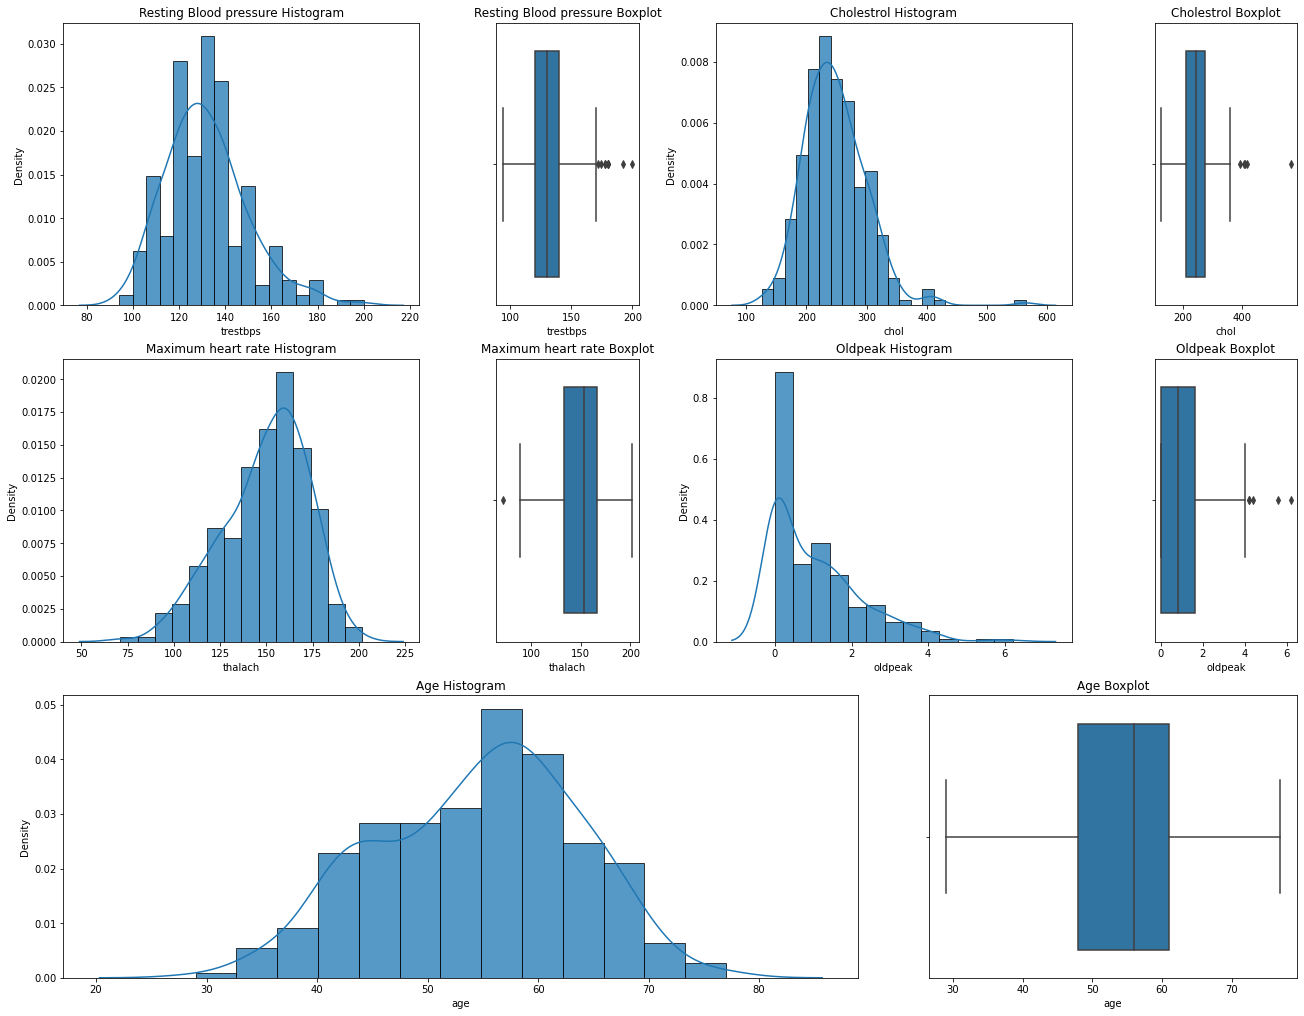

In [40]:
# labeling discrete and numeric variables
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discrete = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


# distribution of numeric varibles
fig = plt.figure(constrained_layout=True, figsize=(18, 14))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Resting Blood pressure Histogram')
sns.distplot(df[numeric[1]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Resting Blood pressure Boxplot')
sns.boxplot(df[numeric[1]])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Cholestrol Histogram')
sns.distplot(df[numeric[2]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Cholestrol Boxplot')
sns.boxplot(df[numeric[2]])

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Maximum heart rate Histogram')
sns.distplot(df[numeric[3]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax35 = fig.add_subplot(grid[1, 2:3])
ax35.set_title('Maximum heart rate Boxplot')
sns.boxplot(df[numeric[3]] )

ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Histogram')
sns.distplot(df[numeric[4]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax45 = fig.add_subplot(grid[1, 5:])
ax45.set_title('Oldpeak Boxplot')
sns.boxplot(df[numeric[4]] )

ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Histogram')
sns.distplot(df[numeric[0]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax55 = fig.add_subplot(grid[2, 4:])
ax55.set_title('Age Boxplot')
sns.boxplot(df[numeric[0]] )

plt.show()

# Distribution of Target

The distribution of the target variable was visualised using a pie chart, it
can be observed that the target variable is binary, split 54:46 with slightly more individuals
displaying cvd absence than presence. It is important to determine the class ratio in the target
variable since imbalanced classes can lead to misleading accuracy scores. With
this knowledge, I can decide the appropriate evaluation metrics to employ.

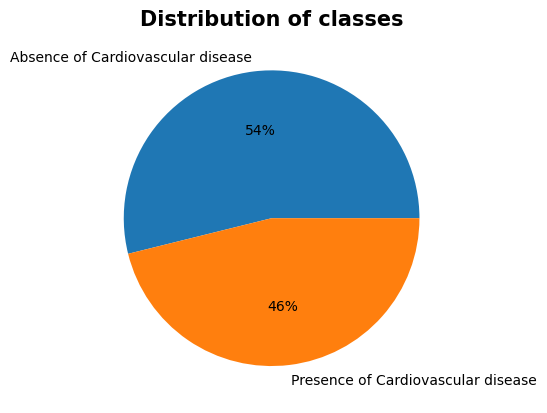

In [35]:
# pie chart showing distrbution of target classes 

plt.pie(df['target'].value_counts(),labels = ['Absence of Cardiovascular disease' , 'Presence of Cardiovascular disease'], autopct = '%.0f%%')
plt.title('Distribution of classes',fontdict={'fontweight': 'bold', 'fontsize': 15});

# Multivariate analysis

Multivariate analysis was conducted to determine the relationships between each of the attributes.
First, a correlation matrix was constructed to visualise the strength and direction of any linear
correlations between the attributes.

From the correlation matrix, we can see the features with strongest correlation to the target
variable are type of thalassemia (thal; 0.52), the number of major vessels coloured by fluoroscopy
(ca; 0.46), maximum heart rate (thalach; -0.42) and ST depression induced by exercise (oldpeak;
0.42). The features with the weakest correlation to the target were identified to be fasting blood
sugar (fbs; 0.0032) and serum cholesterol (chol; 0.08)

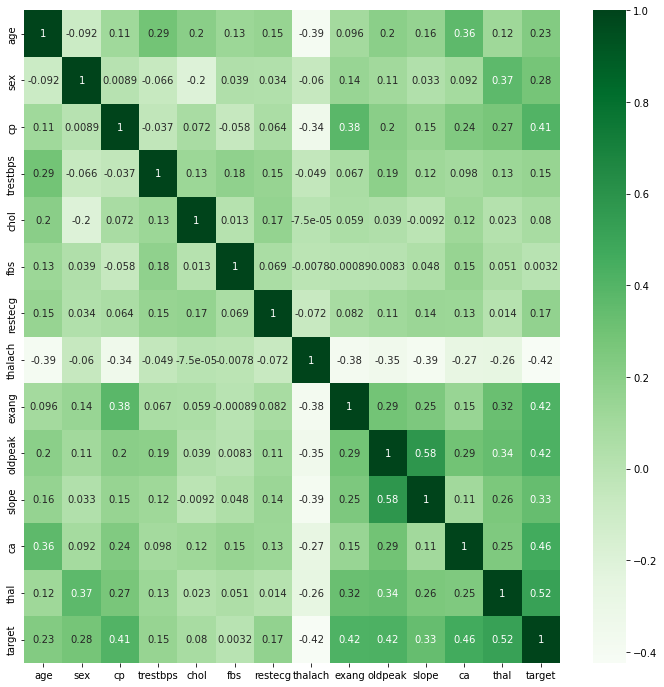

In [45]:
# correlartion matrix
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cbar = True, annot= True,cmap = 'Greens');

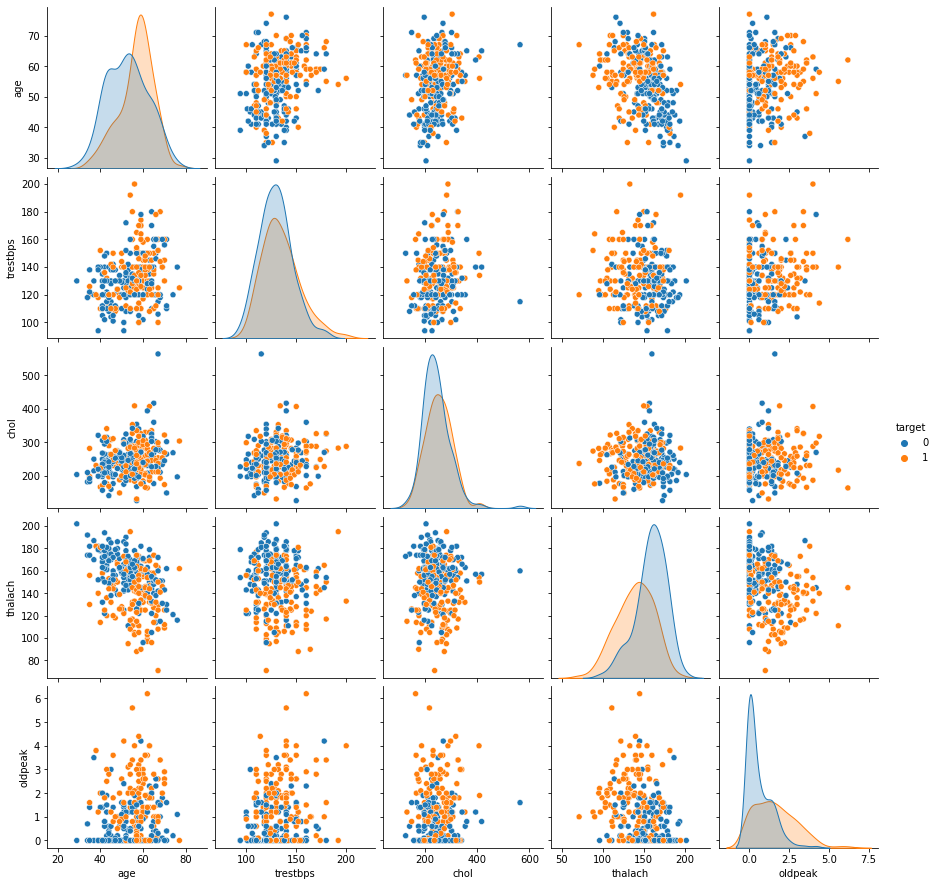

In [46]:
# pair plot with continuous variables
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']],hue = 'target');

# Data Preprocessing

In [49]:
# ML librarys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score ,f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# One Hot Encoding 

ML algorithms do not permit the use of categorical data directly. Categorical data must first be
transformed into numeric data before it can be used. One approach commonly used to transform
categorical data is called one-hot encoding. During one-hot encoding, features of categorical string
data are transformed into multiple features of binary numeric data, this allows the data to be used
for ML algorithms

In [47]:
# one hot encoding discrete variables
df= pd.get_dummies(df,columns=['sex','fbs','exang','cp','restecg','slope','ca','thal'],drop_first = False)
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,fbs_0,fbs_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,63,145,233,150,2.3,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0.2,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
298,45,110,264,132,1.2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
299,68,144,193,141,3.4,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
300,57,130,131,115,1.2,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


# Train test split

Training and testing an algorithm using the entire dataset can result in a highly complex model with
high variance, this type of model is referred to as overfit. An overfit model is one that learns the
detail and noise in the training data too well. Overfit models perform exceptionally well on training
data however perform poorly on unseen test data (Géron, 2019). One simple technique to prevent
this from happening is to split the data into training and testing sets, this enables the algorithm to be
trained on a subset of data, typically 80%, known as training data, and evaluated on the remaining
unseen data, known as testing data, ultimately resulting in a model that generalises better.

In [48]:
# set up Features matrix and target variable
X = df.drop('target', axis = 1)
y = df.target

X.shape,y.shape

((297, 28), (297,))

In [49]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2) # 80 /20 split

X_train.shape, X_test.shape 

((237, 28), (60, 28))

# Feature scaling

Feature scaling is one of the most vital steps in data pre-processing and is defined as the transformation of features
to a homogeneous scale. Feature scaling is employed when numerical features have different units,
this is because differing units can cause many ML algorithms to underperform

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns= X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X.columns)

# Feature selection

Not every feature in a dataset will be helpful for a model, some features may even hinder a model’s
performance. Feature Selection is a process where redundant and irrelevant features are removed, leaving behind a
subset of relevant features to be used in the model. Feature Selection techniques can be split into three
categories named filter, wrapper and embedded

In this project the Feature Selection approach chosen was the embedded method using Random Forest feature importance.

Random Forest Feature Selection was implemented by initialising and fitting a Random Forest model to the training data, next a feature importance ranking graph was printed out. This graph revealed the most and least important features in producing the RF model. The feature “restecg_1” was identified as being the only feature
with a feature importance of 0, hence was subsequently removed.

In [51]:
# default random forest model
rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

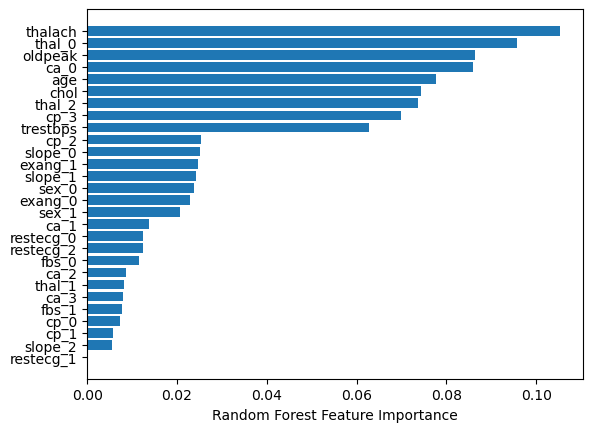

In [52]:
# ploting feature importance in order
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

In [53]:
# removing least important feature ,restecg_1

X_train = X_train.drop(['restecg_1'], axis=1)

X_test = X_test.drop(['restecg_1'], axis=1)

X_train.shape, X_test.shape

((237, 27), (60, 27))

## Cross validation 

In [54]:
# setting up cross validation technique
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)

# K-nearest Neighbors Classifier

K nearest neighbour (KNN) is a non-parametric supervised ML algorithm commonly used for
classification problems, KNN classifies new data point based on the geometric distance from those
already stored in memory

In [55]:
# set up hyperparamter grid 
k_range = list(range(1, 200))

params = dict(n_neighbors=k_range,)

The most important hyperparameter for the KNN algorithm is “n_neighbors”, this defines the
number of neighbours for which distances are calculated. It is critical to carefully adjust this
hyperparameter, since a low value can result in high variance and overfitting while a large value can
increase bias resulting in underfitting

In [56]:
# set up deafaulmodel 
knn = KNeighborsClassifier()

In [57]:
# set up random search object

random_knn = RandomizedSearchCV(knn, params, cv=cv, scoring='recall', n_iter = 200, n_jobs =-1,random_state = 4)

# Fit the random search model to training data
random_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...]},
                   random_state=4, scoring='recall')

In [58]:
# print best value for k
print(random_knn.best_estimator_)

KNeighborsClassifier()


In [60]:
# set up knn model with best hyperparmaters
knn = KNeighborsClassifier()

# fit model to training data
knn.fit(X_train, y_train)

# y pred
y_pred = knn.predict(X_test)

In [61]:
# evaluate knn training and test scores
print('KNN Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('KNN Test accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

KNN Training accuracy: 0.8650
KNN Test accuracy: 0.8167


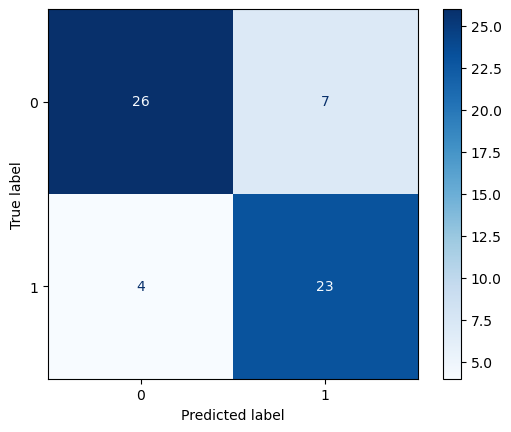

In [62]:
# confusion matrix for knn
plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [63]:
# printing final evaluation metrics for knn
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.817
Precision: 0.767
Recall: 0.852
F1: 0.807


###  KNN  Results
The KNN model achieved a training accuracy of 86.5% and testing accuracy of 81.7%, this testing
accuracy is tied for the worst amongst the evaluated models suggesting that this model did not
generalise as well to new data, additionally this model produced an f1 score of 80.7% which was the
second lowest amongst models indicating that the model's balance between precision and recall is
weaker compared to the other models. However, the model achieved the second highest ROC-AUC
score of 0.915. The confusion matrix uncovers the type of errors produced by the model, in this case,
the confusion matrix reveals this model has a relatively high number of false positives and a
low number of false negatives, this can explain why the model has high recall and low precision.
Overall, this model's performance is mixed, with its strengths in ROC-AUC and recall but weaknesses
in testing accuracy and f1 score.

# Logistic regression model

Logistic regression is a supervised ML algorithm that is frequently used to solve binary
classification problems. Logistic regression utilises a sigmoid logistic function to maps input features
to take probability values between 0 and 1, this allows it to predict discrete categorical outcomes


In [64]:
# set up hyperparamter grid for logistic regression 
params = {'penalty': ['None','l1','l2','elasticnet'],
          'solver' : ['lbfgs','liblinear','saga'],
          'C' : [0.1, 1, 10] }

Three common hyperparameters, “solver”, “penalty”, and “C” require tuning for the LR algorithm.
“Solver” is the type of optimization algorithm employed, “Penalty” refers to the type of
regularisation applied, either l1 or l2. Finally, “C” represents the strength of regularisation applied,
with a smaller value invoking stronger regularisation (B

In [65]:
# set up default logistic regression model 
logreg = LogisticRegression(random_state = 4)

In [66]:
# set up random search object  for logistic model
random_logreg = RandomizedSearchCV(logreg, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 4)

# fit search object to training data 
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=4), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'penalty': ['None', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   random_state=4, scoring='recall')

In [67]:
#  pint best hyperparmaters for logistic regression model
print(random_logreg.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


In [68]:
# printing optimal hyperparmater as list
paramater_values = list((random_logreg.best_params_).values())
paramater_values

['liblinear', 'l1', 0.1]

In [69]:
# constructing best logistic regression model
logreg = LogisticRegression(solver = paramater_values[0],
                           penalty = paramater_values[1],
                           C =  paramater_values[2],
                           random_state = 4)

# fit to training data
logreg.fit(X_train, y_train)

# y pred
y_pred = logreg.predict(X_test)

In [70]:
# logistic regression training and testing accuracy
print('log reg Training accuracy: {:.4f}'.format(logreg.score(X_train,y_train)))
print('log reg Test accuracy: {:.4f}'.format(logreg.score(X_test,y_test)))

log reg Training accuracy: 0.8608
log reg Test accuracy: 0.8333


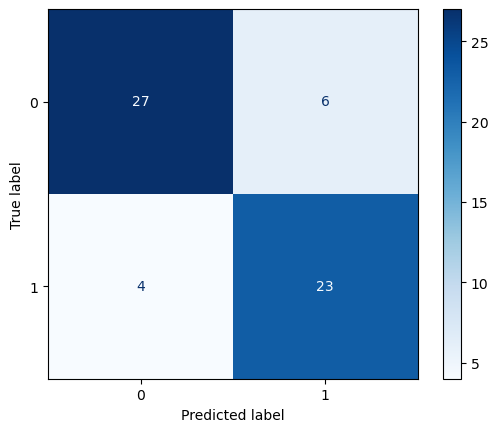

In [71]:
# confusion matrix for best logistic regrssion model
plot_confusion_matrix(logreg,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [72]:
# printing final evaluation metrics for best logistic regression model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.833
Precision: 0.793
Recall: 0.852
F1: 0.821


###  Logistic regression results
The Logistic Regression model achieved a training accuracy of 86.1% and a testing accuracy of 83.3%, this testing
accuracy was ranked joint second highest among the models evaluated, signifying good
generalization performance. Additionally, the model achieved an f1 score of 82.1%, This was also
second highest among the models assessed, signifying a good balance between precision and recall,
furthermore this model attained an ROC-AUC score of 0.898. Overall, the logistic regression model
performed well across all evaluation metrics, demonstrating that it is a consistent and robust model.

# Random Forest Classifier

The Random Forest Classifier is a supervised ML algorithm that consists of a forest of decision
trees. Random Forest employs the ensemble learning approach known as bagging to generates an
uncorrelated forest of DT’s, this decreases variance and consequently produces a model that is
robust and resistance to overfitting

In [73]:
# params for random forest 
params = {'n_estimators': [400, 600, 800, 1000],
            'max_depth':[3, 6, 9, 12, 15],
            'max_features': ['sqrt','log2'],
            'criterion': ['gini', 'entropy']}

The decision tree-based ensemble algorithms, such as Random Forest, adaboost and XGBoost, are composed of
many decision trees. The number of trees in the model is governed by the “n_estimators”
hyperparameter. Increasing the number of trees decreases variance and leads to a more reliable
model, however more trees also carry the burden of a longer computational time.


The “max depth” hyperparameter limits the depth of the decision tree, a high tree depth can
increase risk of overfitting

In [74]:
# set up default random forest model
rf = RandomForestClassifier(random_state = 4)

In [75]:
# random search object
random_rf = RandomizedSearchCV(rf, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 4)

random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=4), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 9, 12, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [400, 600, 800, 1000]},
                   random_state=4, scoring='recall')

In [76]:
# best parmaters for random forest model
print(random_rf.best_params_)

{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy'}


In [77]:
# getting best parmaters as a list
paramater_values = list((random_rf.best_params_).values())
paramater_values

[400, 'sqrt', 3, 'entropy']

In [78]:
# constructing best random forest model
rf = RandomForestClassifier(n_estimators = paramater_values[0],
                            max_features = paramater_values[1],
                            max_depth = paramater_values[2],
                            criterion = paramater_values[3],
                            random_state = 4)

# fit to training data
rf.fit(X_train, y_train)

# y pred
y_pred = rf.predict(X_test)


In [79]:
print('Random forest Training accuracy: {:.4f}'.format(rf.score(X_train,y_train)))
print('Random forest Test accuracy: {:.4f}'.format(rf.score(X_test,y_test)))

Random forest Training accuracy: 0.8819
Random forest Test accuracy: 0.8167


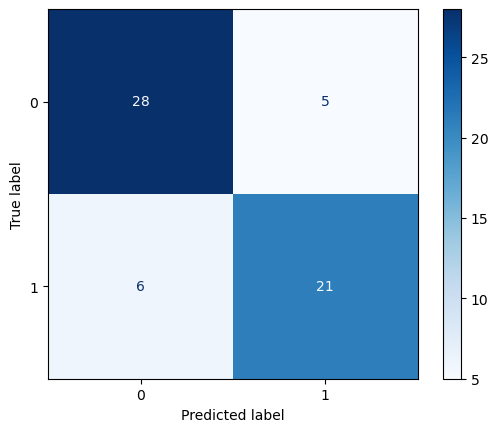

In [80]:
# confusion matrix for random forest
plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [81]:
# evaluation scores
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.817
Precision: 0.808
Recall: 0.778
F1: 0.792


### Random Forest Results
The Random Forest model achieved a training accuracy of 88.2% and a testing accuracy of 81.7%, this large
discrepancy in training and testing accuracy suggests that this model was overfit. Additionally, this
model obtained a subpar F1 score of 79.2%, placing it last among the examined models. This
indicates that the model's precision and recall were inadequately balanced. Moreover, this model
attained a below average ROC-AUC score of 0.897, The confusion matrix (fig 17) reveals this model
obtained a relatively high number of false negatives contributing to its low recall. Overall, the RF
classifier performed worst in terms of testing accuracy, f1 score and recall, additionally it also
underperformed in AUC-ROC, further emphasising that this was one of the worst performing
models.

# AdaBoost Classifier

Adaboost short for adaptive boost is a decision tree-based supervised ML algorithm that utilizes the
ensemble learning technique called boosting. Each of the decision trees used by Adaboost has one
node and one split, these trees are referred to as stumps. Weak learner models are trained
sequentially using error-based weighting that gives wrong predictions additional weight. This is
performed a set number of times, and the results are combined using a weighted total

In [82]:
# hyperparameter grid for adaboost classifier
params = {'n_estimators':[100,200,500,750,1000],
          'learning_rate':[0.001, 0.01, 0.1]}

“Learning rate”, also referred to as shrinkage, is a hyperparameter used in boosting algorithms. It
controls the extent to which each tree contributes to the final prediction and is utilised to prevent
overfitting. Decreasing the learning rate usually necessitates increasing the number of trees in the
model to compensate

In [83]:
# set up defualt adaboost model
ada = AdaBoostClassifier(random_state = 4)

In [84]:
# set up random search object for adaboost classifier
random_ada = RandomizedSearchCV(ada, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 4)

random_ada.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(random_state=4), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'n_estimators': [100, 200, 500, 750,
                                                         1000]},
                   random_state=4, scoring='recall')

In [85]:
# printing best hyperparamters for adboost model
print(random_ada.best_params_)

{'n_estimators': 200, 'learning_rate': 0.01}


In [86]:
# getting best hyperparmaters as a list
paramater_values = list((random_ada.best_params_).values())
paramater_values

[200, 0.01]

In [87]:
# constructing best Adaboost classifier model
ada = AdaBoostClassifier(n_estimators = paramater_values[0], 
                        learning_rate = paramater_values[1],
                        random_state = 4)

# fit best adaboost model to training data 

ada.fit(X_train, y_train)

# y pred
y_pred = ada.predict(X_test)

In [88]:
# train and test score for AdaBoost model 
print('AdaBoost Training accuracy: {:.4f}'.format(ada.score(X_train,y_train)))
print('AdaBoost Test accuracy: {:.4f}'.format(ada.score(X_test,y_test)))

AdaBoost Training accuracy: 0.8565
AdaBoost Test accuracy: 0.8333


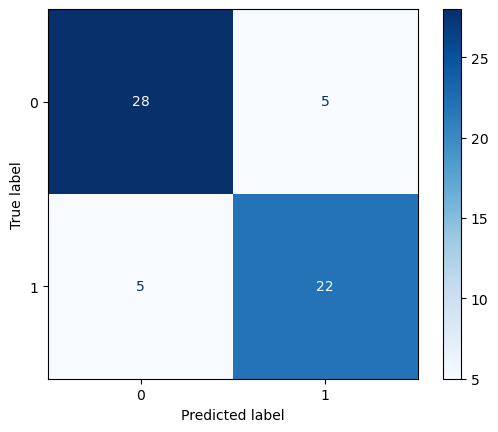

In [89]:
# confusion matrix for AdaBoost model
plot_confusion_matrix(ada ,X_test,y_test,cmap='Blues');
plt.show()

In [90]:
# evaluation scores
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.833
Precision: 0.815
Recall: 0.815
F1: 0.815


### Adaboost Results
The adaboost model achieved a training accuracy of 85.7% and testing accuracy of 83.3%, this
testing accuracy was joint second, indicating that this model was able to generalise effectively to
new data. Additionally, the model obtained a f1 score of 81.5%, ranking it in the median of the
models examined. furthermore, the adaboost model achieved an ROC-AUC score of 0.872, this ROCAUC score was the worst amongst evaluated algorithms. The confusion matrix reveals that the
adaboost model obtained the same number of false positives and false negatives, hence providing a
consistent balance between precision and recall. Overall, the adaboost classifier performed
reasonable in terms of generalisability and f1 score, but poorly in terms of ROC-AUC score therefore
yielding a below average performing model.

# XGBoost Classifier

Extreme gradient boost, or XGBoost, is an open-source library that aims to enhance the gradient
boosting paradigm using a variety of hardware and software optimization techniques. Gradient
boost is a boosting technique similar to adaboost, however unlike adaboost, gradient boost seeks to
fit the new predictor to the residual error of the prior predictor rather than changing weights for
incorrect predictions

In [91]:
# hyperparmater grid for XGBOOST classifier
params = {'colsample_bytree': [0.3, 0.5, 1.0],
          'gamma' : [0.1, 1, 1.5],
          'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
          'min_child_weight' : [1, 5, 10],
          'subsample' : [ 0.8,1.0],
          'n_estimators' : [100, 300, 600, 800, 1000],
          'max_depth' : [5,10,15,20] }

In [92]:
# default XGB model
xgb = XGBClassifier(random_state = 4)

In [93]:
# set up random search object for xgboost classifier
random_xgb = RandomizedSearchCV(xgb, params, cv=cv, scoring='recall', n_iter = 100, n_jobs =-1,random_state = 7)

# fit random search to training data
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           impo...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [94]:
# print best hyperparamaters
print(random_xgb.best_params_)

{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 1.5, 'colsample_bytree': 0.3}


In [95]:
# getting best hyperparmeters as a list
paramater_values = list((random_xgb.best_params_).values())
paramater_values

[0.8, 300, 10, 15, 0.1, 1.5, 0.3]

In [96]:
# constructing best XGBoost classifier model
xgb = XGBClassifier(subsample = paramater_values[0],
                    n_estimators = paramater_values[1],
                    min_child_weight = paramater_values[2],
                    max_depth = paramater_values[3],
                    learning_rate = paramater_values[4],
                    gamma = paramater_values[5],
                    colsample_bytree = paramater_values[6],
                    random_state = 4)

# fit to trainng data 
xgb.fit(X_train, y_train)

# y pred
y_pred = xgb.predict(X_test)

In [97]:
# train and test Accuracy for XGB model
print('XGB Training accuracy: {:.4f}'.format(xgb.score(X_train,y_train)))
print('XGB Test accuracy: {:.4f}'.format(xgb.score(X_test,y_test)))

XGB Training accuracy: 0.8650
XGB Test accuracy: 0.8500


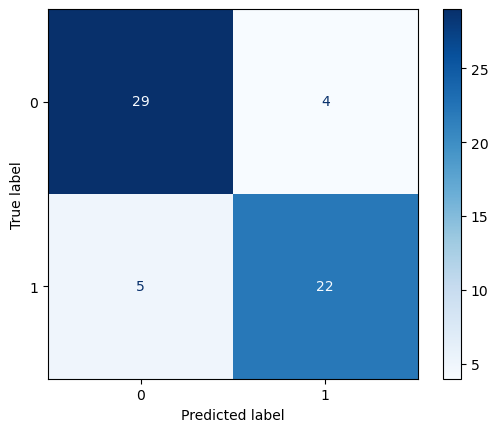

In [98]:
# confusion matrix
plot_confusion_matrix(xgb ,X_test,y_test,cmap=plt.cm.Blues);
plt.show()

In [99]:
# evaluation metrics
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.850
Precision: 0.846
Recall: 0.815
F1: 0.830


### XGboost Results

The XGBoost model achieved a training accuracy of 86.5% and a testing accuracy of 85%, this testing
accuracy was the highest amongst all models evaluated, demonstrating the model’s exceptional
ability to generalise to new data. Additionally, The XGBoost classifier achieved the highest f1 score of
83% and ROC-AUC score of 0.919, further demonstrating its superiority over the other models.
Overall, the XGBoost model was the top performer across all germane evaluation metrics,
confirming its place as the best performing model while also demonstrating its viability as a
trustworthy and powerful algorithm for CVD prediction.

# <u>Summarising Evaluation Metrics</u>

In [100]:
# function to compare evalaution scores
def final_score_comparison(models, X_test, y_test, X_train, y_train):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(X_test)
        train = round(model.score(X_train, y_train), 3)*100
        test = round(accuracy_score(y_test, predictions), 3)*100
        precsion = round(precision_score(y_test, predictions), 3)*100
        recall = round(recall_score(y_test, predictions), 3)*100
        f1 = round(f1_score(y_test, predictions), 3)*100
        scores[str(model)] = [train, test, precsion, recall, f1]
    scores.index = ['Train Accuracy','Test Accuracy', 'Precsion', 'Recall', 'F1 score']
    return scores

In [101]:
# calling function on tuned models to print evaluation scores in Table
final_scores = final_score_comparison([knn, logreg, rf, ada, xgb ], X_test, y_test, X_train, y_train)
final_scores.columns = ['KNeighbors Classifier','Logistic Regression','Random Forest Classifier','AdaBoost Classifier ' ,'XGBoost Classifier']
final_scores = final_scores.transpose()

final_scores

,Train Accuracy,Test Accuracy,Precsion,Recall,F1 score
KNeighbors Classifier,86.5,81.7,76.7,85.2,80.7
Logistic Regression,86.1,83.3,79.3,85.2,82.1
Random Forest Classifier,88.2,81.7,80.8,77.8,79.2
AdaBoost Classifier,85.7,83.3,81.5,81.5,81.5
XGBoost Classifier,86.5,85.0,84.6,81.5,83.0


# AUC-ROC scores

In [102]:
# function to compare ROC  curves
def AUC_score_comparison(models, test_features, test_labels, train_features, train_labels):
    scores = pd.DataFrame()
    for model in models:
        y_score = model.predict_proba(test_features)
        AUC = round(roc_auc_score(test_labels, y_score[:, 1]), 3)
        scores[str(model)] = [AUC]
    scores.index = ['AUC-ROC Score']
    return scores

AUC_scores = AUC_score_comparison([ knn, logreg, rf, ada, xgb], X_test,y_test,X_train,y_train)
AUC_scores.columns = ['KNeighbors Classifier','Logistic Regression','Random Forest Classifier','AdaBoost Classifier ','XGBoost Classifier']
AUC_scores = AUC_scores.transpose()

AUC_scores

,AUC-ROC Score
KNeighbors Classifier,0.915
Logistic Regression,0.898
Random Forest Classifier,0.897
AdaBoost Classifier,0.872
XGBoost Classifier,0.919


In [103]:
# joining both tables into one table
final_result_table=final_scores.join(AUC_scores)
final_result_table

,Train Accuracy,Test Accuracy,Precsion,Recall,F1 score,AUC-ROC Score
KNeighbors Classifier,86.5,81.7,76.7,85.2,80.7,0.915
Logistic Regression,86.1,83.3,79.3,85.2,82.1,0.898
Random Forest Classifier,88.2,81.7,80.8,77.8,79.2,0.897
AdaBoost Classifier,85.7,83.3,81.5,81.5,81.5,0.872
XGBoost Classifier,86.5,85.0,84.6,81.5,83.0,0.919


# Performance metric visualisations 

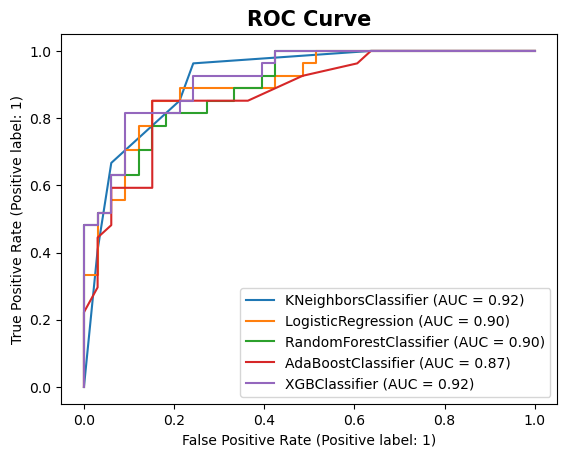

In [104]:
# comparing ROC curves of all models
disp2 = plot_roc_curve(knn,X_test,y_test)
plot_roc_curve(logreg,X_test,y_test,ax=disp2.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp2.ax_)
plot_roc_curve(ada,X_test,y_test,ax=disp2.ax_)
plot_roc_curve(xgb,X_test,y_test,ax=disp2.ax_)

plt.title('ROC Curve',fontweight='bold', fontsize=15);

# Confusion matrix visualisation 

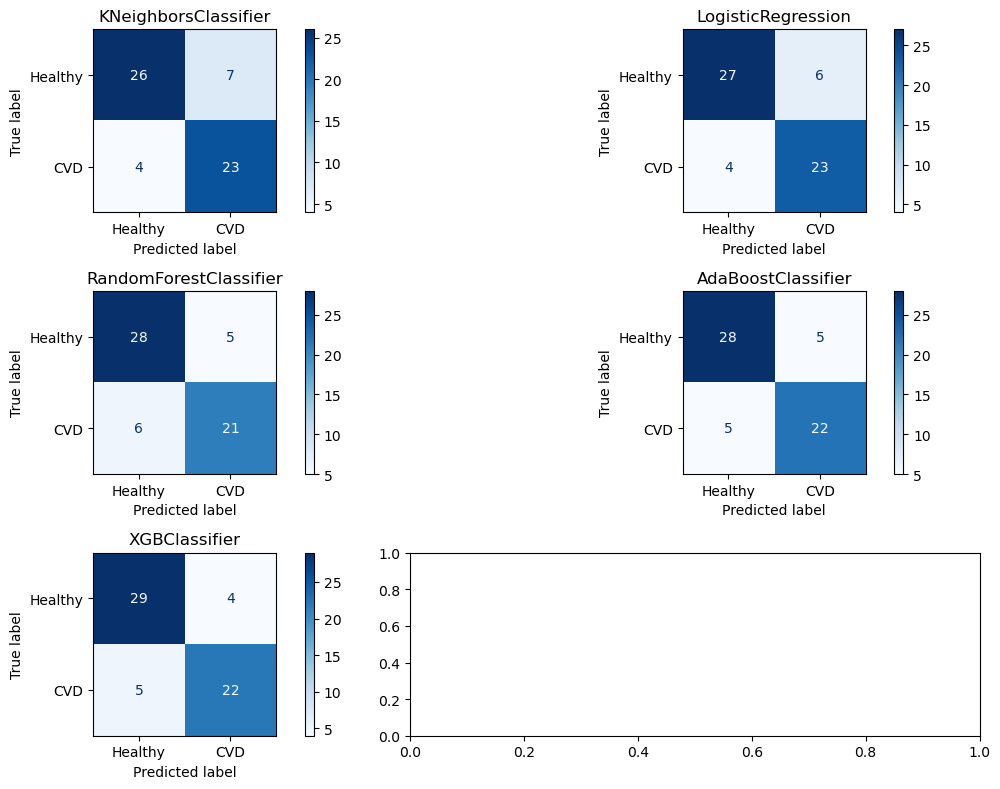

In [105]:
# plotting confusion matrixes

Models = [knn, logreg, rf, ada, xgb]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,8))

for models, ax in zip(Models, axes.flatten()):
    plot_confusion_matrix(models, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["Healthy", "CVD"])
    ax.title.set_text(type(models).__name__)

plt.tight_layout()  
plt.show()

# <u>Findings and Discussion<u/>

In this project, five ML algorithms (KNN, RF, LR, adaboost, XGBoost) were trained, tuned and
evaluated using the Cleveland heart disease dataset to predict CVD. The performance of each model
was assessed using a variety of evaluation metrics with testing accuracy, f1 score and ROC-AUC score
taking the most value. The results reveal all models performed well, achieving testing accuracy’s >
80%, in layman’s terms this means each algorithm was able to correctly predict an individual as
either having or not having CVD > 80% of the time. The best performing model was found to be the
XGBoost classifier attaining the highest scores in testing accuracy (85%), f1 score (83%) and ROC-AUC
score (0.919). I believe the XGBoost model outperformed other models due to its ensemble
approach with integrated optimisation strategies such as regularisation to prevent overfitting (Chen
and Guestrin, 2016), this can be evidenced by the minor difference between its training and testing
accuracy scores. The worst performing model was found to be the RF classifier achieving the lowest
results in testing accuracy (81.7%) and f1 score (79.2%), I believe this was due to the RF classifier
being overfit, as evidenced by the significant disparity between its training and testing accuracy, this
was a surprising discovery given RF's notoriety for tolerance to overfitting.


Overall, these findings justify the use of ML as an alternative tool for CVD detection. All models
exhibit a high level of predictive performance, with XGBoost ranking best. This bodes well for future
research seeking to implement these models into clinical settings in order to enhance a physicians’
ability to diagnose CVD.

# <u>Limitations and Future Work<u/>
### Limitations
One limitation of my project was my dataset's relatively small sample size, this was a result of the
limited availability of public large-scale CVD datasets due to privacy concerns. A larger dataset would
allow the algorithms to capture more underlying patterns in the data and further improve
generalisability. Furthermore, a larger dataset would have also enabled me to employ deep learning
algorithms, this would have enabled me to produce models with superior performance.
Another limitation of my project was the lack of hybrid FS techniques utilised. Hybrid FS would have
allowed me to combine the use of filter and wrapper methods, resulting in a more powerful
selection of features, however this was unfeasible for me due to wrapper methods taking up
significant computational costs.
### Future work
The findings from this project adds to the growing corpus of research on the use of ML for CVD
prediction, nevertheless there are still various avenues future work can take to enhance this topic
area. One route for future work is the experimentation with Generative Adversarial Networks (GAN)
to generate synthetic data, this can help tackle the privacy concerns over
the use real patient data. 

Future work could also incorporate more advanced modelling techniques,
such as ensemble modelling with stacking, this can lead to more robust models with improved
performance. Additionally, future studies should refine and test these algorithms on larger and more
diverse populations, allowing the models to be adopted globally rather than for a specific
demographic. Finally, future work should concentrate on developing tools that can allow these
models to be easily implemented in healthcare settings. This is important because the earlier they
are implemented, the earlier CVD can be detected in patients allowing for the administration of
preventative medication, avoiding premature mortality.

# <u>Conclusion<u/>

CVD is a debilitating disease affecting all parts of the world, complications with current diagnostic
methods such as speed and accessibility require the need for alternative approaches. ML offers an
alternative approach which can allow for early detection facilitating prophylactic treatment, thereby
preventing premature deaths. The primary objective of this project was to train, tune and evaluate
several ML algorithms that will be able to accurately predict patients with CVD. More specific
objectives included incorporating embedded feature selection in conjunction with hyperparameter
optimisation. Furthermore, the final objective was to evaluate and compare the performances of
each algorithm in order to identify which was the most effective. I believe these objectives were
successfully met as I was able to develop and train five ML algorithms (KNN, RF, LR, adaboost,
XGBoost) on the Cleveland heart disease dataset, additionally I was able to implement embedded
feature selection using RF to remove irrelevant features as well as employ random search
hyperparameter tuning to augment the performance of each algorithm. Finally, after evaluating
each algorithm's performance I discovered that XGBoost was the best performing model, achieving
highest scores across all relevant evaluation metrics with a distinguished testing accuracy of 85%.
The findings of this project highlight the application of ML in accurately detecting patients with CVD,
with the addition of FS and hyperparameter optimization approaches to further increase
performance. Future research can make use of these findings and implement into clinical settings to
assist physicians in diagnosing CVD earlier, providing additional time for protective treatment and
mitigating premature mortality.